## Voetgangers


0: 384x640 2 mensens, 1 zebrapad, 95.0ms
Speed: 16.0ms preprocess, 95.0ms inference, 1266.3ms postprocess per image at shape (1, 3, 384, 640)


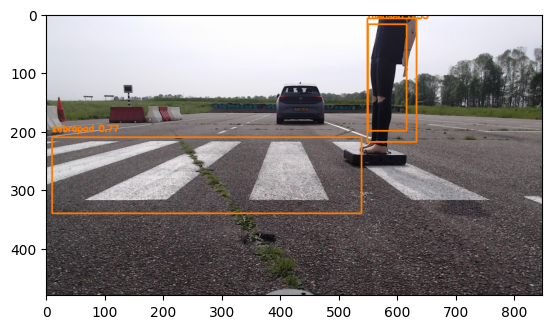

In [1]:
from ultralytics import YOLO
from IPython.display import display, Image
import supervision as sv
import cv2
import matplotlib.pyplot as plt

model = YOLO("best.pt")

image_path = "zebra_en_mens.png"
image = cv2.imread(image_path)

# Predict
results = model.predict(image)

# Draw bounding boxes on the image
for result in results:
    boxes = result.boxes.xyxy  # Extract bounding box coordinates
    classes = result.boxes.cls.cpu().numpy()  # Extract class IDs
    confidences = result.boxes.conf.cpu().numpy()  # Extract confidences
    class_to_label = result.names
    
    # Iterate over each detected object
    for box, class_id, confidence in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = map(int, box)
        if class_id in class_to_label:
            label_name = class_to_label[class_id] + " " + str(round(confidence, 2))  # Get label name from dictionary
        else:
            label_name = "Unknown" + " " + str(round(confidence, 2))  # If class ID not found in dictionary
        # Draw bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 122, 255), 2)
        cv2.putText(image, label_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 122, 255), 2)

# Display the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
print(results[0].boxes.cls)
print(results)

tensor([4., 1., 1.])
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'groen', 1: 'mensen', 2: 'rood', 3: 'snelheid', 4: 'zebrapad'}
obb: None
orig_img: array([[[240, 229, 225],
        [240, 229, 225],
        [240, 229, 225],
        ...,
        [242, 232, 232],
        [242, 232, 232],
        [242, 232, 232]],

       [[239, 228, 224],
        [239, 228, 224],
        [240, 229, 225],
        ...,
        [241, 231, 231],
        [241, 231, 231],
        [241, 231, 231]],

       [[238, 227, 223],
        [238, 227, 223],
        [238, 227, 223],
        ...,
        [239, 229, 229],
        [239, 229, 229],
        [239, 229, 229]],

       ...,

       [[ 76,  72,  77],
        [ 59,  55,  60],
        [ 58,  57,  61],
        ...,
        [ 29,  28,  38],
        [ 36,  34,  40],
        [ 37,  36,  40]],

       [[ 59,  51,  58],
        [ 60,  52,  59],
        [ 51,  47,  53],
 

In [3]:
class_predictions = results[0].boxes.cls.tolist()

# Checken of er zowel een zebrapad als een mens aanwezig is in de voorspellingen
if 1 in class_predictions and 4 in class_predictions:
    print("Both class 1 and 4 are present in the predictions")
else:
    print("Either class 1 or 4 (or both) is missing from the predictions")

Both class 1 and 4 are present in the predictions


In [4]:
def get_bbox(results, class_name):
    """
    Kijkt voor een gegeven class of er bounding
    boxes zijn gevonden.
    """
    # Kijken of alle items correct zijn
    for result in results:
        if hasattr(result, 'names') and hasattr(result, 'boxes'):
            # Zoeken van de class index
            class_index = None
            for index, name in result.names.items():
                if name == class_name:
                    class_index = index
                    break

            # Ga door als de class_index niet is gevonden
            if class_index is None:
                continue

            # Ophalven van de box voor de class
            for box in result.boxes:
                if box.cls == class_index:
                    # Ophalen van de box coordinaten
                    x1, y1, x2, y2 = box.xyxy[0]
                    width = x2 - x1
                    height = y2 - y1
                    return [x1, y1, width, height]

    # Return None als er geen box van die class is gevonden
    return None

In [5]:
zebra = get_bbox(results, "mensen")
zebra

[tensor(550.4606), tensor(17.4808), tensor(65.9316), tensor(182.1375)]

In [6]:
x, y, width, height = zebra
x = int(x)
y = int(y)
width = int(width)
height = int(height)
print(x, y, width, height)

right = x + width
bottom = y + height
print(right, bottom)

550 17 65 182
615 199


In [7]:
class_predictions = results[0].boxes.cls.tolist()

if 1 in class_predictions and 4 in class_predictions:
    if 0 < right < 100:
        throttle = 1.0
        brake = 0.0
        print("Rijden")
    elif 100 < right < 600:
        pass
    elif 600 <= right < 900:
        throttle = 0.0
        brake = 1.0
        print("Stoppen")

Stoppen
